In [36]:
import pandas as pd
import datetime
import collections
import matplotlib.pyplot as plt
df = pd.read_csv("snoasis.csv")
temps = pd.read_csv('Temp for 2023 Ada.csv')

In [37]:
df

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment
0,2/28/2023,7:50:56 PM,SnOasis Main,1,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
1,2/28/2023,7:52:12 PM,SnOasis Main,2,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
2,2/28/2023,7:58:14 PM,SnOasis Main,3,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
3,2/28/2023,8:21:15 PM,SnOasis Main,4,Candy Bar,NaN,NaN,1,1.5,0.0,1.5,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN
4,2/28/2023,9:29:15 PM,SnOasis East,5,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76214,11/5/2023,5:42:06 PM,SnOasis Main,37192,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76215,11/5/2023,5:44:05 PM,SnOasis Main,37193,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76216,11/5/2023,5:48:20 PM,SnOasis Main,37194,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76217,11/5/2023,5:51:32 PM,SnOasis Main,37195,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN


In [38]:
df.groupby("Date")

In [39]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df['month'] = df['Date'].apply(lambda x: "%d" % (x.month))

In [41]:
freqs = collections.Counter(df["month"])

In [42]:
freqs

Counter({'2': 13,
         '3': 10732,
         '4': 12142,
         '5': 13172,
         '6': 13380,
         '7': 12061,
         '8': 8836,
         '9': 4147,
         '10': 1649,
         '11': 87})

In [43]:
df_days_grouped = df.groupby('Date', as_index=False).sum()

<ipython-input-43-b6e6c9680d8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_days_grouped = df.groupby('Date', as_index=False).sum()


In [44]:
df_days_grouped['weekday'] = df_days_grouped['Date'].apply(lambda x: "%d" % (x.weekday()))

In [45]:
df['weekday'] = df['Date'].apply(lambda x: "%d" % (x.weekday()))

In [46]:
df_days_grouped

,Date,Receipt number,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,weekday
0,2023-02-28,78,0.0,0.0,13,19.75,0.0,24.75,1.01,20.76,0.0,0.0,0.0,0.0,1
1,2023-03-02,239,0.0,0.0,7,17.50,0.0,19.50,0.94,18.44,0.0,0.0,0.0,0.0,3
2,2023-03-04,80343,0.0,0.0,918,1519.25,0.0,4273.50,143.05,1662.30,0.0,0.0,0.0,0.0,5
3,2023-03-05,229641,0.0,0.0,993,1686.50,0.0,4459.25,158.87,1845.37,0.0,0.0,0.0,0.0,6
4,2023-03-06,346275,0.0,0.0,792,1374.75,-1.0,3405.75,128.59,1502.34,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2023-10-25,667336,0.0,0.0,24,50.25,0.0,94.75,4.72,54.97,0.0,0.0,0.0,0.0,2
232,2023-10-26,2411272,0.0,0.0,94,148.25,0.0,392.75,13.97,162.22,0.0,0.0,0.0,0.0,3
233,2023-10-27,631016,0.0,0.0,19,34.75,0.0,65.00,3.27,38.02,0.0,0.0,0.0,0.0,4
234,2023-11-04,1039676,0.0,0.0,45,95.25,0.0,191.75,8.96,104.21,0.0,0.0,0.0,0.0,5


In [47]:
df_weekdays_grouped = df.groupby('weekday', as_index=False).sum()

<ipython-input-47-e2a82b64f4a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekdays_grouped = df.groupby('weekday', as_index=False).sum()


In [48]:
df_weekdays_grouped

,weekday,Receipt number,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment
0,0,187722359,0.0,0.0,15424,27303.02,-11.00,65198.81,2562.28,29854.30,0.0,0.0,0.0,0.0
1,1,194369793,0.0,0.0,15061,27275.75,-14.34,76113.23,2512.89,29774.30,0.0,0.0,0.0,0.0
2,2,211946056,0.0,0.0,16391,29349.00,0.00,75429.50,2721.12,32070.12,0.0,0.0,0.0,0.0
3,3,221535155,0.0,0.0,15643,27915.96,-3.67,64698.47,2619.05,30531.34,0.0,0.0,0.0,0.0
4,4,218963901,0.0,0.0,17283,31534.25,-16.50,73781.00,2959.44,34477.19,0.0,0.0,0.0,0.0
5,5,214079723,0.0,0.0,18801,33860.41,-10.97,83235.72,3187.81,37037.25,0.0,0.0,0.0,0.0
6,6,154030011,0.0,0.0,12961,23081.00,-9.17,57595.65,2172.16,25243.99,0.0,0.0,0.0,0.0


<BarContainer object of 7 artists>

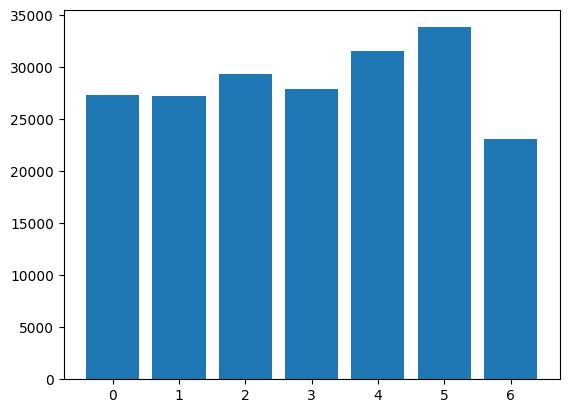

In [49]:
plt.bar(df_weekdays_grouped['weekday'],df_weekdays_grouped['Price (USD)'])

<BarContainer object of 236 artists>

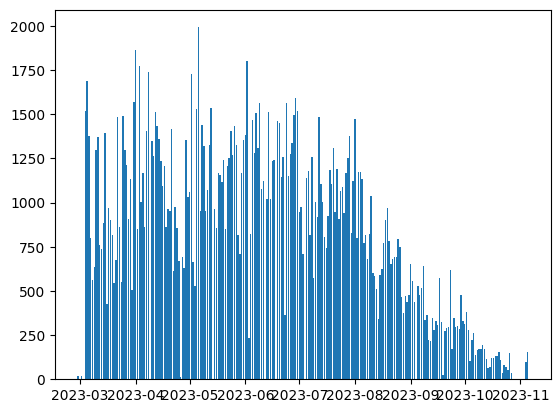

In [50]:
plt.bar(df_days_grouped['Date'],df_days_grouped['Price (USD)'])

In [51]:
weekday_freqs = collections.Counter(df_days_grouped["weekday"])
weekday_freqs

Counter({'1': 34, '3': 35, '5': 35, '6': 32, '0': 32, '2': 34, '4': 34})

In [52]:
temps['DATE'] = pd.to_datetime(temps[['YEAR', 'MONTH', 'DAY']])

In [53]:
temps

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,HAVG,RAIN,RMAX,DATE
0,2023,1,1,ADAX,76.53,45.08,60.34,61.93,0.0,0.0,2023-01-01
1,2023,1,2,ADAX,71.62,54.34,64.21,86.50,0.0,0.0,2023-01-02
2,2023,1,3,ADAX,58.51,34.37,50.27,50.10,0.0,0.0,2023-01-03
3,2023,1,4,ADAX,53.89,27.37,40.20,61.00,0.0,0.0,2023-01-04
4,2023,1,5,ADAX,58.39,28.90,40.38,56.05,0.0,0.0,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...
361,2023,12,28,ADAX,44.52,28.97,35.42,62.52,0.0,0.0,2023-12-28
362,2023,12,29,ADAX,54.41,27.84,37.99,66.37,0.0,0.0,2023-12-29
363,2023,12,30,ADAX,63.46,28.07,42.63,58.34,0.0,0.0,2023-12-30
364,2023,12,31,ADAX,52.11,29.51,39.94,69.01,0.0,0.0,2023-12-31


In [54]:
df_days_grouped = df_days_grouped.rename(columns={'Date': 'DATE'})

In [55]:
merged_df = pd.merge(df_days_grouped, temps, on='DATE')

In [56]:
merged_df

,DATE,Receipt number,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),...,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,HAVG,RAIN,RMAX
0,2023-02-28,78,0.0,0.0,13,19.75,0.0,24.75,1.01,20.76,...,2023,2,28,ADAX,77.83,39.47,62.20,35.49,0.00,0.00
1,2023-03-02,239,0.0,0.0,7,17.50,0.0,19.50,0.94,18.44,...,2023,3,2,ADAX,62.20,42.67,51.09,77.94,0.55,0.36
2,2023-03-04,80343,0.0,0.0,918,1519.25,0.0,4273.50,143.05,1662.30,...,2023,3,4,ADAX,68.97,36.37,53.69,69.17,0.00,0.00
3,2023-03-05,229641,0.0,0.0,993,1686.50,0.0,4459.25,158.87,1845.37,...,2023,3,5,ADAX,76.39,49.69,63.13,54.33,0.00,0.00
4,2023-03-06,346275,0.0,0.0,792,1374.75,-1.0,3405.75,128.59,1502.34,...,2023,3,6,ADAX,78.15,46.32,64.30,56.81,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2023-10-25,667336,0.0,0.0,24,50.25,0.0,94.75,4.72,54.97,...,2023,10,25,ADAX,73.27,65.08,68.56,93.76,0.50,0.48
232,2023-10-26,2411272,0.0,0.0,94,148.25,0.0,392.75,13.97,162.22,...,2023,10,26,ADAX,80.01,66.45,71.25,85.62,0.00,0.00
233,2023-10-27,631016,0.0,0.0,19,34.75,0.0,65.00,3.27,38.02,...,2023,10,27,ADAX,75.36,52.34,62.78,87.10,0.40,1.20
234,2023-11-04,1039676,0.0,0.0,45,95.25,0.0,191.75,8.96,104.21,...,2023,11,4,ADAX,76.71,49.69,61.89,71.88,0.00,0.00


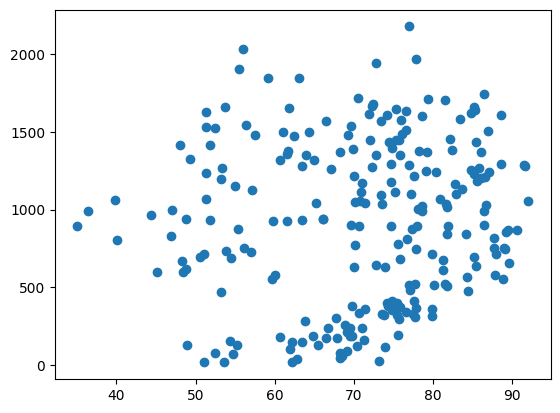

In [58]:
plt.scatter(merged_df["TAVG"], merged_df["Final price (USD)"])

In [63]:
df.loc[df.weekday == '3']

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),...,Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,month,weekday
13,2023-03-02,6:28:20 PM,SnOasis Main,12,Snickers,NaN,NaN,1,1.50,0.0,...,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN,3,3
14,2023-03-02,6:28:20 PM,SnOasis Main,12,Kit Kat,NaN,NaN,1,1.50,0.0,...,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN,3,3
15,2023-03-02,6:28:20 PM,SnOasis Main,12,Skittles,NaN,NaN,1,1.50,0.0,...,Yes,No,0.00,1.50,NaN,NaN,0.0,NaN,3,3
16,2023-03-02,6:29:15 PM,SnOasis Main,13,Snickers,NaN,NaN,1,1.50,0.0,...,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN,3,3
17,2023-03-02,6:29:15 PM,SnOasis Main,13,Kit Kat,NaN,NaN,1,1.50,0.0,...,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76110,2023-10-26,5:51:36 PM,SnOasis Main,37111,Cream,NaN,NaN,1,0.50,0.0,...,Yes,No,0.05,0.55,NaN,NaN,0.0,NaN,10,3
76111,2023-10-26,5:51:36 PM,SnOasis Main,37111,Lime,NaN,NaN,1,0.50,0.0,...,Yes,No,0.05,0.55,NaN,NaN,0.0,NaN,10,3
76112,2023-10-26,5:57:05 PM,SnOasis Main,37112,Kiddie,NaN,NaN,2,3.00,0.0,...,Yes,No,0.28,3.28,NaN,NaN,0.0,NaN,10,3
76113,2023-10-26,5:59:56 PM,SnOasis Main,37113,Medium,NaN,NaN,1,2.75,0.0,...,Yes,No,0.26,3.01,NaN,NaN,0.0,NaN,10,3


In [60]:
df

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),...,Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,month,weekday
0,2023-02-28,7:50:56 PM,SnOasis Main,1,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,2,1
1,2023-02-28,7:52:12 PM,SnOasis Main,2,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,2,1
2,2023-02-28,7:58:14 PM,SnOasis Main,3,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,2,1
3,2023-02-28,8:21:15 PM,SnOasis Main,4,Candy Bar,NaN,NaN,1,1.5,0.0,...,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN,2,1
4,2023-02-28,9:29:15 PM,SnOasis East,5,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76214,2023-11-05,5:42:06 PM,SnOasis Main,37192,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,11,6
76215,2023-11-05,5:44:05 PM,SnOasis Main,37193,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,11,6
76216,2023-11-05,5:48:20 PM,SnOasis Main,37194,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,11,6
76217,2023-11-05,5:51:32 PM,SnOasis Main,37195,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,11,6
